In [1]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary

from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedRandomWalk, GenerateBasedPrimRST

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt 

from os import path

In [3]:
import numpy as np
import pandas as pd
import pylab
from scipy import stats
import statsmodels.api as sm

In [4]:
import config

In [5]:
# nro_individuals = 500
# nro_individuals=750
# nro_individuals = 1_000

In [6]:
def test_normal_distribution(costs_values):
    print(10*'= ')
    print("Test if costs is normal distributed")
       
    result = stats.shapiro(costs_values)

    print("P-value: ", result.pvalue)
    
    if result.pvalue <= 0.05:
        print("Reject Null Hypotesis: the costs distribution doesn't follow a normal distribution.")
    else:
        print("Accept Null Hypotesis: the costs distribution follows a normal distribution.")
    
    print(10*'= ')
    print("Mean: ", np.mean(costs_values))
    print("St Dev:", np.std(costs_values))
    print("Skewness: ", stats.skew(costs_values))
    
    
def compare_initial_population_for(instance_problem, nro_individuals):
    
    filename = path.join(config.dataset_directory, instance_problem)
    stpg = ReaderORLibrary().parser(filename)
    
    print("STPG information", '\n', 10*'- ','\n')
    print('Instance: ', stpg.name)
    print('Best Known cost: ', STEIN_B[INDEX][1])
    print("Nro. Node:", stpg.nro_nodes)
    print("Nro. Edges:", stpg.nro_edges)
    print("Nro. Terminals:", stpg.nro_terminals)
    print("Terminals: \n", stpg.terminals)
#     print(10*'- ')
    
    gen_randomWalk = GenerateBasedRandomWalk(stpg)
    gen_primRST = GenerateBasedPrimRST(stpg)
    evaluator = EvaluateTreeGraph(stpg)
    
    costs_randomWalk = np.array([evaluator(gen_randomWalk())[0] 
                                   for _ in range(nro_individuals)])
    
    test_normal_distribution(costs_randomWalk)
    
#     sns.boxplot(x=costs_randomWalk)
#     sns.displot(costs_randomWalk, kde=True)
#     sm.qqplot(costs_randomWalk, line='s')
    
    costs_primBased = np.array([evaluator(gen_primRST())[0] 
                              for _ in range(nro_individuals)])
    
    test_normal_distribution(costs_primBased)
    
#     sns.boxplot(x=costs_primBased)
#     sns.displot(costs_primBased, kde=True)
#     sm.qqplot(costs_primBased, line='s')
    
    df = pd.DataFrame(data=costs_primBased, columns=["primBased"])
    df['randomWalk'] = costs_randomWalk
    
    ax = sns.displot(df)
    ax.set(title="Comparando distribuições")
    
    
#     result_ttest = stats.ttest_ind(costs_randomWalk, cost_primBased)
#     print(result_ttest)
#     print()
#     print(result_ttest.pvalue < 0.005)

    var_randomWalk = np.var(costs_randomWalk)
    var_primBased  = np.var(costs_primBased)
    
    ratio = max(var_randomWalk, var_primBased) / min(var_randomWalk, var_primBased)
    
    same_var = ratio < 4
    
    result_ttest2 = stats.ttest_ind(costs_randomWalk, 
                                   costs_primBased, 
                                   equal_var=same_var)
    print(10*'= ')
    print("Test if the population mean are equal or different.")
    print("Same var population: ", same_var)
    print("P-value: ", result_ttest2.pvalue)

    if result_ttest2.pvalue < 0.05:
        print("Reject: the cost mean are different.")
    else :
        print("Accept: the cost mean are the same.")
        
    print(10*"= ")
    print("Perform the Mann-Whitney U test")
    result_Utest = stats.mannwhitneyu(costs_randomWalk, 
                                        costs_primBased, 
                                        alternative='two-sided')
    
    print("P-value: ", result_Utest.pvalue)

In [7]:
INDEX = 17

filename = STEIN_B[INDEX][0]

print(filename)

steinb18.txt


STPG information 
 - - - - - - - - - -  

Instance:  B18
Best Known cost:  218
Nro. Node: 100
Nro. Edges: 200
Nro. Terminals: 50
Terminals: 
 {5, 9, 11, 16, 17, 18, 19, 20, 21, 23, 25, 27, 33, 34, 36, 38, 40, 43, 44, 46, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 66, 67, 69, 70, 79, 81, 82, 83, 84, 85, 88, 89, 91, 93, 94, 95, 97, 100}
= = = = = = = = = = 
Test if costs is normal distributed
P-value:  0.028058091178536415
Reject Null Hypotesis: the costs distribution doesn't follow a normal distribution.
= = = = = = = = = = 
Mean:  557.43
St Dev: 21.73690640362607
Skewness:  -0.25877374005932985
= = = = = = = = = = 
Test if costs is normal distributed
P-value:  0.09306474030017853
Accept Null Hypotesis: the costs distribution follows a normal distribution.
= = = = = = = = = = 
Mean:  557.77
St Dev: 22.13732368648026
Skewness:  -0.17019750589001484
= = = = = = = = = = 
Test if the population mean are equal or different.
Same var population:  True
P-value:  0.8066593568058645
Accept:

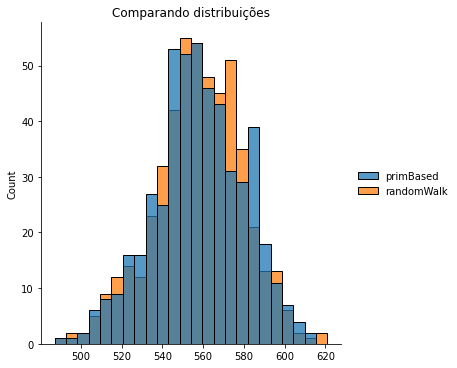

In [8]:
compare_initial_population_for(filename, 500)

STPG information 
 - - - - - - - - - -  

Instance:  B18
Best Known cost:  218
Nro. Node: 100
Nro. Edges: 200
Nro. Terminals: 50
Terminals: 
 {5, 9, 11, 16, 17, 18, 19, 20, 21, 23, 25, 27, 33, 34, 36, 38, 40, 43, 44, 46, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 66, 67, 69, 70, 79, 81, 82, 83, 84, 85, 88, 89, 91, 93, 94, 95, 97, 100}
= = = = = = = = = = 
Test if costs is normal distributed
P-value:  0.508545458316803
Accept Null Hypotesis: the costs distribution follows a normal distribution.
= = = = = = = = = = 
Mean:  557.6973333333333
St Dev: 20.66243918052486
Skewness:  0.09357806299869872
= = = = = = = = = = 
Test if costs is normal distributed
P-value:  0.7088984251022339
Accept Null Hypotesis: the costs distribution follows a normal distribution.
= = = = = = = = = = 
Mean:  557.9893333333333
St Dev: 22.68785033644415
Skewness:  0.05304919135644206
= = = = = = = = = = 
Test if the population mean are equal or different.
Same var population:  True
P-value:  0.794576108765208

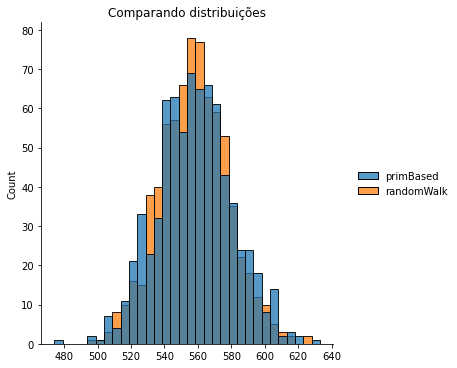

In [9]:
compare_initial_population_for(filename, 750)

STPG information 
 - - - - - - - - - -  

Instance:  B18
Best Known cost:  218
Nro. Node: 100
Nro. Edges: 200
Nro. Terminals: 50
Terminals: 
 {5, 9, 11, 16, 17, 18, 19, 20, 21, 23, 25, 27, 33, 34, 36, 38, 40, 43, 44, 46, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 66, 67, 69, 70, 79, 81, 82, 83, 84, 85, 88, 89, 91, 93, 94, 95, 97, 100}
= = = = = = = = = = 
Test if costs is normal distributed
P-value:  0.5875978469848633
Accept Null Hypotesis: the costs distribution follows a normal distribution.
= = = = = = = = = = 
Mean:  558.436
St Dev: 21.787287669648098
Skewness:  -0.018691726189308443
= = = = = = = = = = 
Test if costs is normal distributed
P-value:  0.03137890249490738
Reject Null Hypotesis: the costs distribution doesn't follow a normal distribution.
= = = = = = = = = = 
Mean:  559.713
St Dev: 21.38421452847871
Skewness:  -0.20108897835229592
= = = = = = = = = = 
Test if the population mean are equal or different.
Same var population:  True
P-value:  0.1862778330900865
Accep

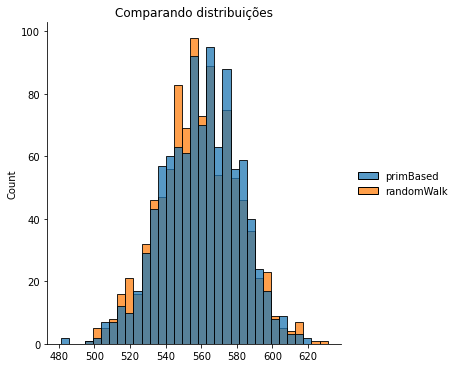

In [10]:
compare_initial_population_for(filename, 1_000)

## Referências

1. [How to Conduct a Two Sample T-Test in Python](https://www.statology.org/two-sample-t-test-python/)
2. [How to Conduct a Mann-Whitney U Test in Python](https://www.statology.org/mann-whitney-u-test-python/)
3. [Levene’s Test: The Assessment for Equality of Variances](https://medium.com/@kyawsawhtoon/levenes-test-the-assessment-for-equality-of-variances-94503b695a57)
4. [Python T-Test – A Friendly Guide](https://www.hackdeploy.com/python-t-test-a-friendly-guide)
5. [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
6. [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)


In [11]:
def test_shapiro(costs, pvalue=0.05):
    
    result = stats.shapiro(costs)
    
    return result.pvalue < pvalue
    

In [12]:
def calc_max_edges(k):
    
    return k * (k-1) / 2

In [13]:
%%time 

data = list()

nro_samples = 200

for instance, _ in STEIN_B:
    filename = path.join(config.dataset_directory, instance)

    reader = ReaderORLibrary()
    stpg = reader.parser(filename)
    gen_primRST = GenerateBasedPrimRST(stpg)
    evaluator = EvaluateTreeGraph(stpg)

    tmp = list()
    print(instance, end='\r')

    for i in range(100):
        costs = np.array([evaluator(gen_primRST())[0] 
                                       for _ in range(nro_samples)])
        tmp.append(test_shapiro(costs))
        print(instance, i*"#", end='\r')
    # collect data
    print(instance, 100*"#", end='\n')
    nro_nodes = stpg.nro_nodes
    nro_edges = stpg.nro_edges
    nro_terminals = len(stpg.terminals)
    nro_max_edges = calc_max_edges(stpg.nro_nodes)
    density = nro_edges / nro_max_edges
    
    total = sum(tmp)
    data.append([instance, total, total/len(tmp), density, nro_nodes, nro_edges, nro_terminals])

steinb1.txt ####################################################################################################
steinb2.txt ####################################################################################################
steinb3.txt ####################################################################################################
steinb4.txt ####################################################################################################
steinb5.txt ####################################################################################################
steinb6.txt ####################################################################################################
steinb7.txt ####################################################################################################
steinb8.txt ####################################################################################################
steinb9.txt ####################################################################################

In [14]:
df = pd.DataFrame(data, columns=["Instance", "Total_Reject", "Rel_Reject", "Density", "Nro_Nodes", "Nro_Edges", "Nro_Terminals"])
df.head()

,Instance,Total_Reject,Rel_Reject,Density,Nro_Nodes,Nro_Edges,Nro_Terminals
0,steinb1.txt,100,1.00,0.051429,50,63,9
1,steinb2.txt,100,1.00,0.051429,50,63,13
2,steinb3.txt,51,0.51,0.051429,50,63,25
3,steinb4.txt,83,0.83,0.081633,50,100,9
4,steinb5.txt,60,0.60,0.081633,50,100,13


<AxesSubplot:xlabel='Total_Reject', ylabel='Instance'>

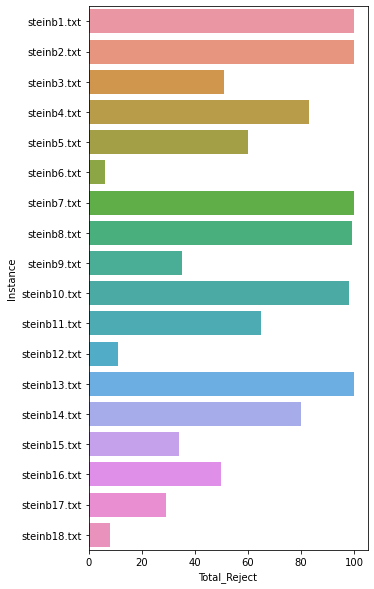

In [15]:
plt.figure(figsize=(5,10))
sns.barplot(y='Instance', x='Total_Reject', data=df)

<AxesSubplot:xlabel='Nro_Terminals', ylabel='Total_Reject'>

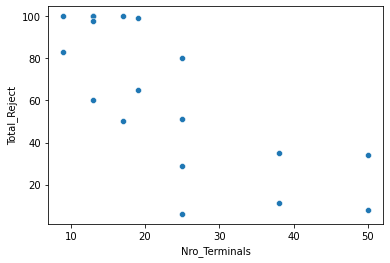

In [16]:
sns.scatterplot(x='Nro_Terminals', y='Total_Reject', data=df)

<AxesSubplot:xlabel='Density', ylabel='Total_Reject'>

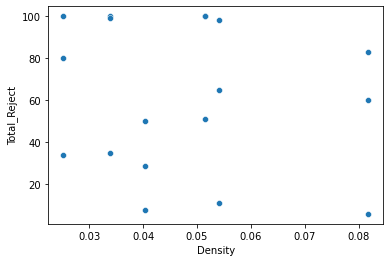

In [17]:
sns.scatterplot(x='Density', y='Total_Reject', data=df)